# Age and Education Level of 2017 Czech Parliament Election Candidates

Choose at least three parties that are going to participate in the election.
Scrap the web pages https://volby.cz to get list of all candidates for the chosen parties
(good place to start: https://volby.cz/pls/ps2017/ps11?xjazyk=CZ&xv=1&xt=1).

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
def read_party_df(url):
    r = requests.get(url)
    dfs = pd.read_html(r.text, flavor='bs4', skiprows=2)
    column_names = {1: 'kraj', 2: 'por_cislo', 3: 'jmeno', 4: 'vek',
                    5: 'navrhujici_strana', 6: 'politicka_prislusnost'}
    # first two rows are columns names
    # drop uninmportant columns
    # correct columns names
    return dfs[0].drop([0, 1])\
                 .drop([0, 7, 8], axis=1)\
                 .rename(index=lambda x: x - 2, columns=column_names)

In [4]:
urls = {
    'ano': 'https://volby.cz/pls/ps2017/ps111?xjazyk=CZ&xkraj=0&xstrana=21&xv=1&xt=1',
    'dsss': 'https://volby.cz/pls/ps2017/ps111?xjazyk=CZ&xkraj=0&xstrana=28&xv=1&xt=1',
    'kscm': 'https://volby.cz/pls/ps2017/ps111?xjazyk=CZ&xkraj=0&xstrana=8&xv=1&xt=1',
    'pirati': 'https://volby.cz/pls/ps2017/ps111?xjazyk=CZ&xkraj=0&xstrana=15&xv=1&xt=1',
}

dfs = {party: read_party_df(url) for party, url in urls.items()}

## 1. Use Data Visualisation to Depict the Age Distribution of Candidates
    
- How many candidates are young/old/middle aged?
- Which party has older candidates compared to the others?

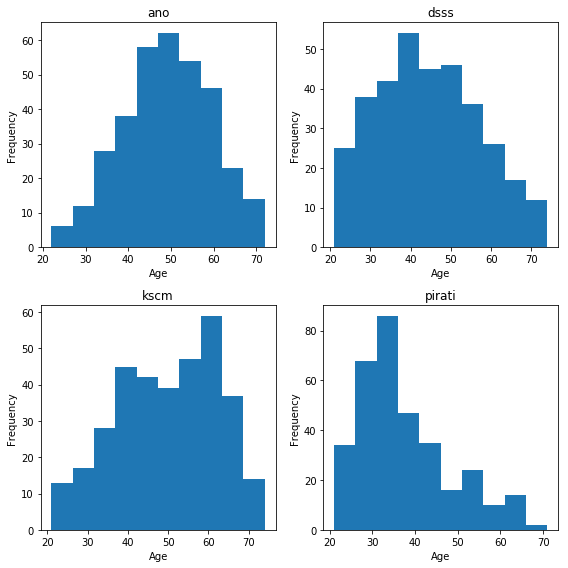

In [5]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
for (party, df), ax in zip(dfs.items(), axes.ravel()):
    df['vek'].plot.hist(ax=ax)
    ax.set_title(party)
    ax.set_xlabel('Age')
fig.tight_layout()

## 2. Use the Titles of Candidates to Get the Idea on Education Levels


Try to distinguish at least three education levels corresponding to:

- no title,
- Bc.,
- Ing., Mgr. and analogous and higher.
    
E.g. *Barteček Ivo prof. PhDr. CSc.* has three titles 'prof.', 'PhDr.' and 'CSc.'.

Your visualisation should answer at least these questions:

- How frequent are the education levels of candidates for each of the chousen parties?
- How *'educated'* is each party compared to the others?
- How frequent is each education level within all candidates?